KeyboardInterrupt: 

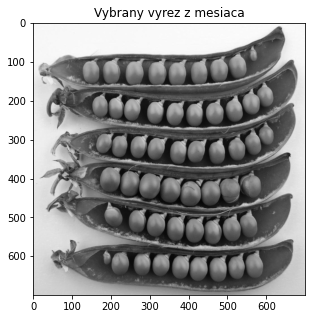

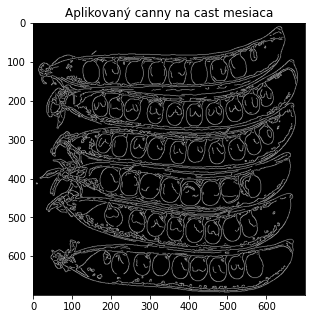

In [1]:
from collections import defaultdict
from math import pi, cos, sin
import matplotlib.pyplot as plt
from skimage import io, feature, transform
import cv2
import numpy as np
from skimage.measure import label, regionprops

full_moon = io.imread("1.jpg")

def RobertKrajnak(img):
    
    plt.figure(figsize=(5, 5))
    plt.title('Vybrany vyrez z mesiaca')
    im = cv2.cvtColor(full_moon, cv2.COLOR_BGR2GRAY)
    myArea = cv2.resize(im, dsize=(700, 700))
    plt.imshow(myArea,  cmap='gray')
    
    canny_resize_pm = feature.canny(myArea) 
    
    plt.figure(figsize= (5, 5))
    plt.title('Aplikovaný canny na cast mesiaca')
    plt.imshow(canny_resize_pm, cmap='gray')
    
    Rmin = 10
    Rmax = 100 
    steps = 50 
    threshold = 0.53
    
    dot = []
    for r in range(Rmin, Rmax + 1):
        for t in range(steps):
            dot.append((r, int(r * cos(2 * pi * t / steps)), int(r * sin(2 * pi * t / steps))))
    
    ac = defaultdict(int)
    for x in range(canny_resize_pm.shape[0]):
        for y in range(canny_resize_pm.shape[1]):
            if canny_resize_pm[x][y]:
                for r, dx, dy in dot:
                    a = x - dx
                    b = y - dy
                    ac[(a, b, r)] += 1
    
    circles = []
    for k, v in sorted(ac.items(), key=lambda i: -i[1]):
        x, y, r = k
        if v / steps >= threshold and all((x - xc) ** 2 + (y - yc) ** 2 > rc ** 2 for xc, yc, rc in circles):
            circles.append((x, y, r))
            
    fig, ax = plt.subplots(figsize= (5, 5))
    ax.imshow(myArea, cmap='gray')
    plt.title("Najdene mensie kratery")
    count_circle = 0
    five_craters = []
    frame = int(canny_resize_pm.shape[0]/4)
    for circle in circles:
        if frame < circle[0] < canny_resize_pm.shape[0] - frame \
                and frame < circle[1] < canny_resize_pm.shape[0] - frame:
            ax.add_artist(plt.Circle((circle[1],circle[0]), circle[2], color= 'b', fill= False)) # vykreslenie kruhov
            five_craters.append((circle[0], circle[1], circle[2])) #pridanie x, y, r do pola
            count_circle += 1
        if count_circle == 15:
            plt.show()
            break
            
    #najdem regiony(centra kruznic)
    # label_H = label(H>t)
    # regions_H = regionprops(label_H)

    # centers=[]
    # for region in regions_H:
    #     centers.append(region.centroid)
    # p_count=len(centers)

    # return p_count,centers
    
        
numberOfPeas, pixelCoordinates = RobertKrajnak(full_moon)

print(numberOfPeas)
print(pixelCoordinates)